In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
import os
from scipy.stats import sem

In [2]:
# load data from experiments ... input is the path to a directory that has gait data
# each experiment should be in a separate folder
# each treatment within an experiment should be in a separate folder
tardi_gait = '/Users/iwoods/OneDrive - Ithaca College/tardi_gait_2011TT-2022Summer'
os.chdir(tardi_gait)
for d in listDirectories():
    print(d)

2021_3iy_Fall
2021_caffeine_Fall
2021_ldopa_Fall
3iy_July2022
alcohol_43mM_June2022
analyzed_movies
caffeine_20µM_June2022
comps
crawler
micrometer_vids
nicotine_100µM_July2022
noTreatment_noTreatment_July2022
old_code
species_comps_2021
wildT_july2022


In [3]:
exp = '2021_3iy_Fall'
exp_dir = os.path.join(tardi_gait, exp)
os.chdir(exp_dir)

# Get a list of available experiments in this directory
print('looking in ' + exp_dir )

for d in listDirectories():
    print(d)

looking in /Users/iwoods/OneDrive - Ithaca College/tardi_gait_2011TT-2022Summer/2021_3iy_Fall
3iy_1mg_cw_6min-iw
3iy_control-cw-2min-iw


In [4]:
# choose which folders to compare
groupA = '3iy_control-cw-2min-iw'
groupB = '3iy_1mg_cw_6min-iw'
fname = 'all_step_data_swings.csv' # created by the script save_step_data.py

In [5]:
# treatment 1: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df1 = experimentToDf(groupA,fname)
print('DF size',df1.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips1 = np.unique(df1['clip'])
size_speed_1 = sizeAndSpeed(groupA, clips1)

df1[df1.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: CW-control-2min-iw-118-133
2: CW-control-2min-iw-145-158
3: CW-control-2min-iw-202-228
4: CW-control-2min-iw-21-40
5: select ALL

Which number(s) do you want? 5

You chose them all

Found CW-control-2min-iw-118-133/all_step_data_swings.csv
Found CW-control-2min-iw-145-158/all_step_data_swings.csv
Found CW-control-2min-iw-202-228/all_step_data_swings.csv
Found CW-control-2min-iw-21-40/all_step_data_swings.csv
DF size (662, 17)
... converting from pixels to micrometers
No info about analyzed frame times ... getting that now ... 
   ... start is 0.033, end is 16.848


ZeroDivisionError: float division by zero

In [6]:
# treatment 2: select experiment(s) to analyze
# look for all_step_data_swings.csv in one or more folders, and combine data
df2 = experimentToDf(groupB,fname)
print('DF size',df2.shape)

# look for mov_data.txt in one or more folders, and parse to get size and speed for these clips
clips2 = np.unique(df2['clip'])
size_speed_2 = sizeAndSpeed(groupB, clips2)

df2[df2.ref_leg=='R3'].head(3)


Choose from this list (separate by commas if multiple choices): 
1: 3iy_1mg_cw_6min_335-345
2: 3iy_1mg_cw_6min_417-429
3: 3iy_1mg_cw_6min_433-444
4: 3iy_1mg_cw_6min_505-516
5: select ALL

Which number(s) do you want? 5

You chose them all

Found 3iy_1mg_cw_6min_335-345/all_step_data_swings.csv
Found 3iy_1mg_cw_6min_417-429/all_step_data_swings.csv
Found 3iy_1mg_cw_6min_433-444/all_step_data_swings.csv
Found 3iy_1mg_cw_6min_505-516/all_step_data_swings.csv
DF size (212, 17)
... converting from pixels to micrometers
No info about analyzed frame times ... getting that now ... 
   ... start is 0.033, end is 11.978


ZeroDivisionError: float division by zero

In [ ]:
# how many tardigrades in each group?
tardigrades_in_clip1 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips1]))
print('Group 1 has ' + str(len(tardigrades_in_clip1)) + ' individual(s): ' + ', '.join(tardigrades_in_clip1))
tardigrades_in_clip1 = [int(x) for x in tardigrades_in_clip1]

tardigrades_in_clip2 = np.unique(sorted([individualFromClipname(clipname) for clipname in clips2]))
print('Group 2 has ' + str(len(tardigrades_in_clip2)) + ' individual(s): ' + ', '.join(tardigrades_in_clip2))
tardigrades_in_clip2 = [int(x) for x in tardigrades_in_clip2]

In [ ]:
#df1['clip'] = df1['clip'].replace('CW-control-2min-iw-118-133', 'control')


One tardigrade in each group, doing compare_step_parameters plot



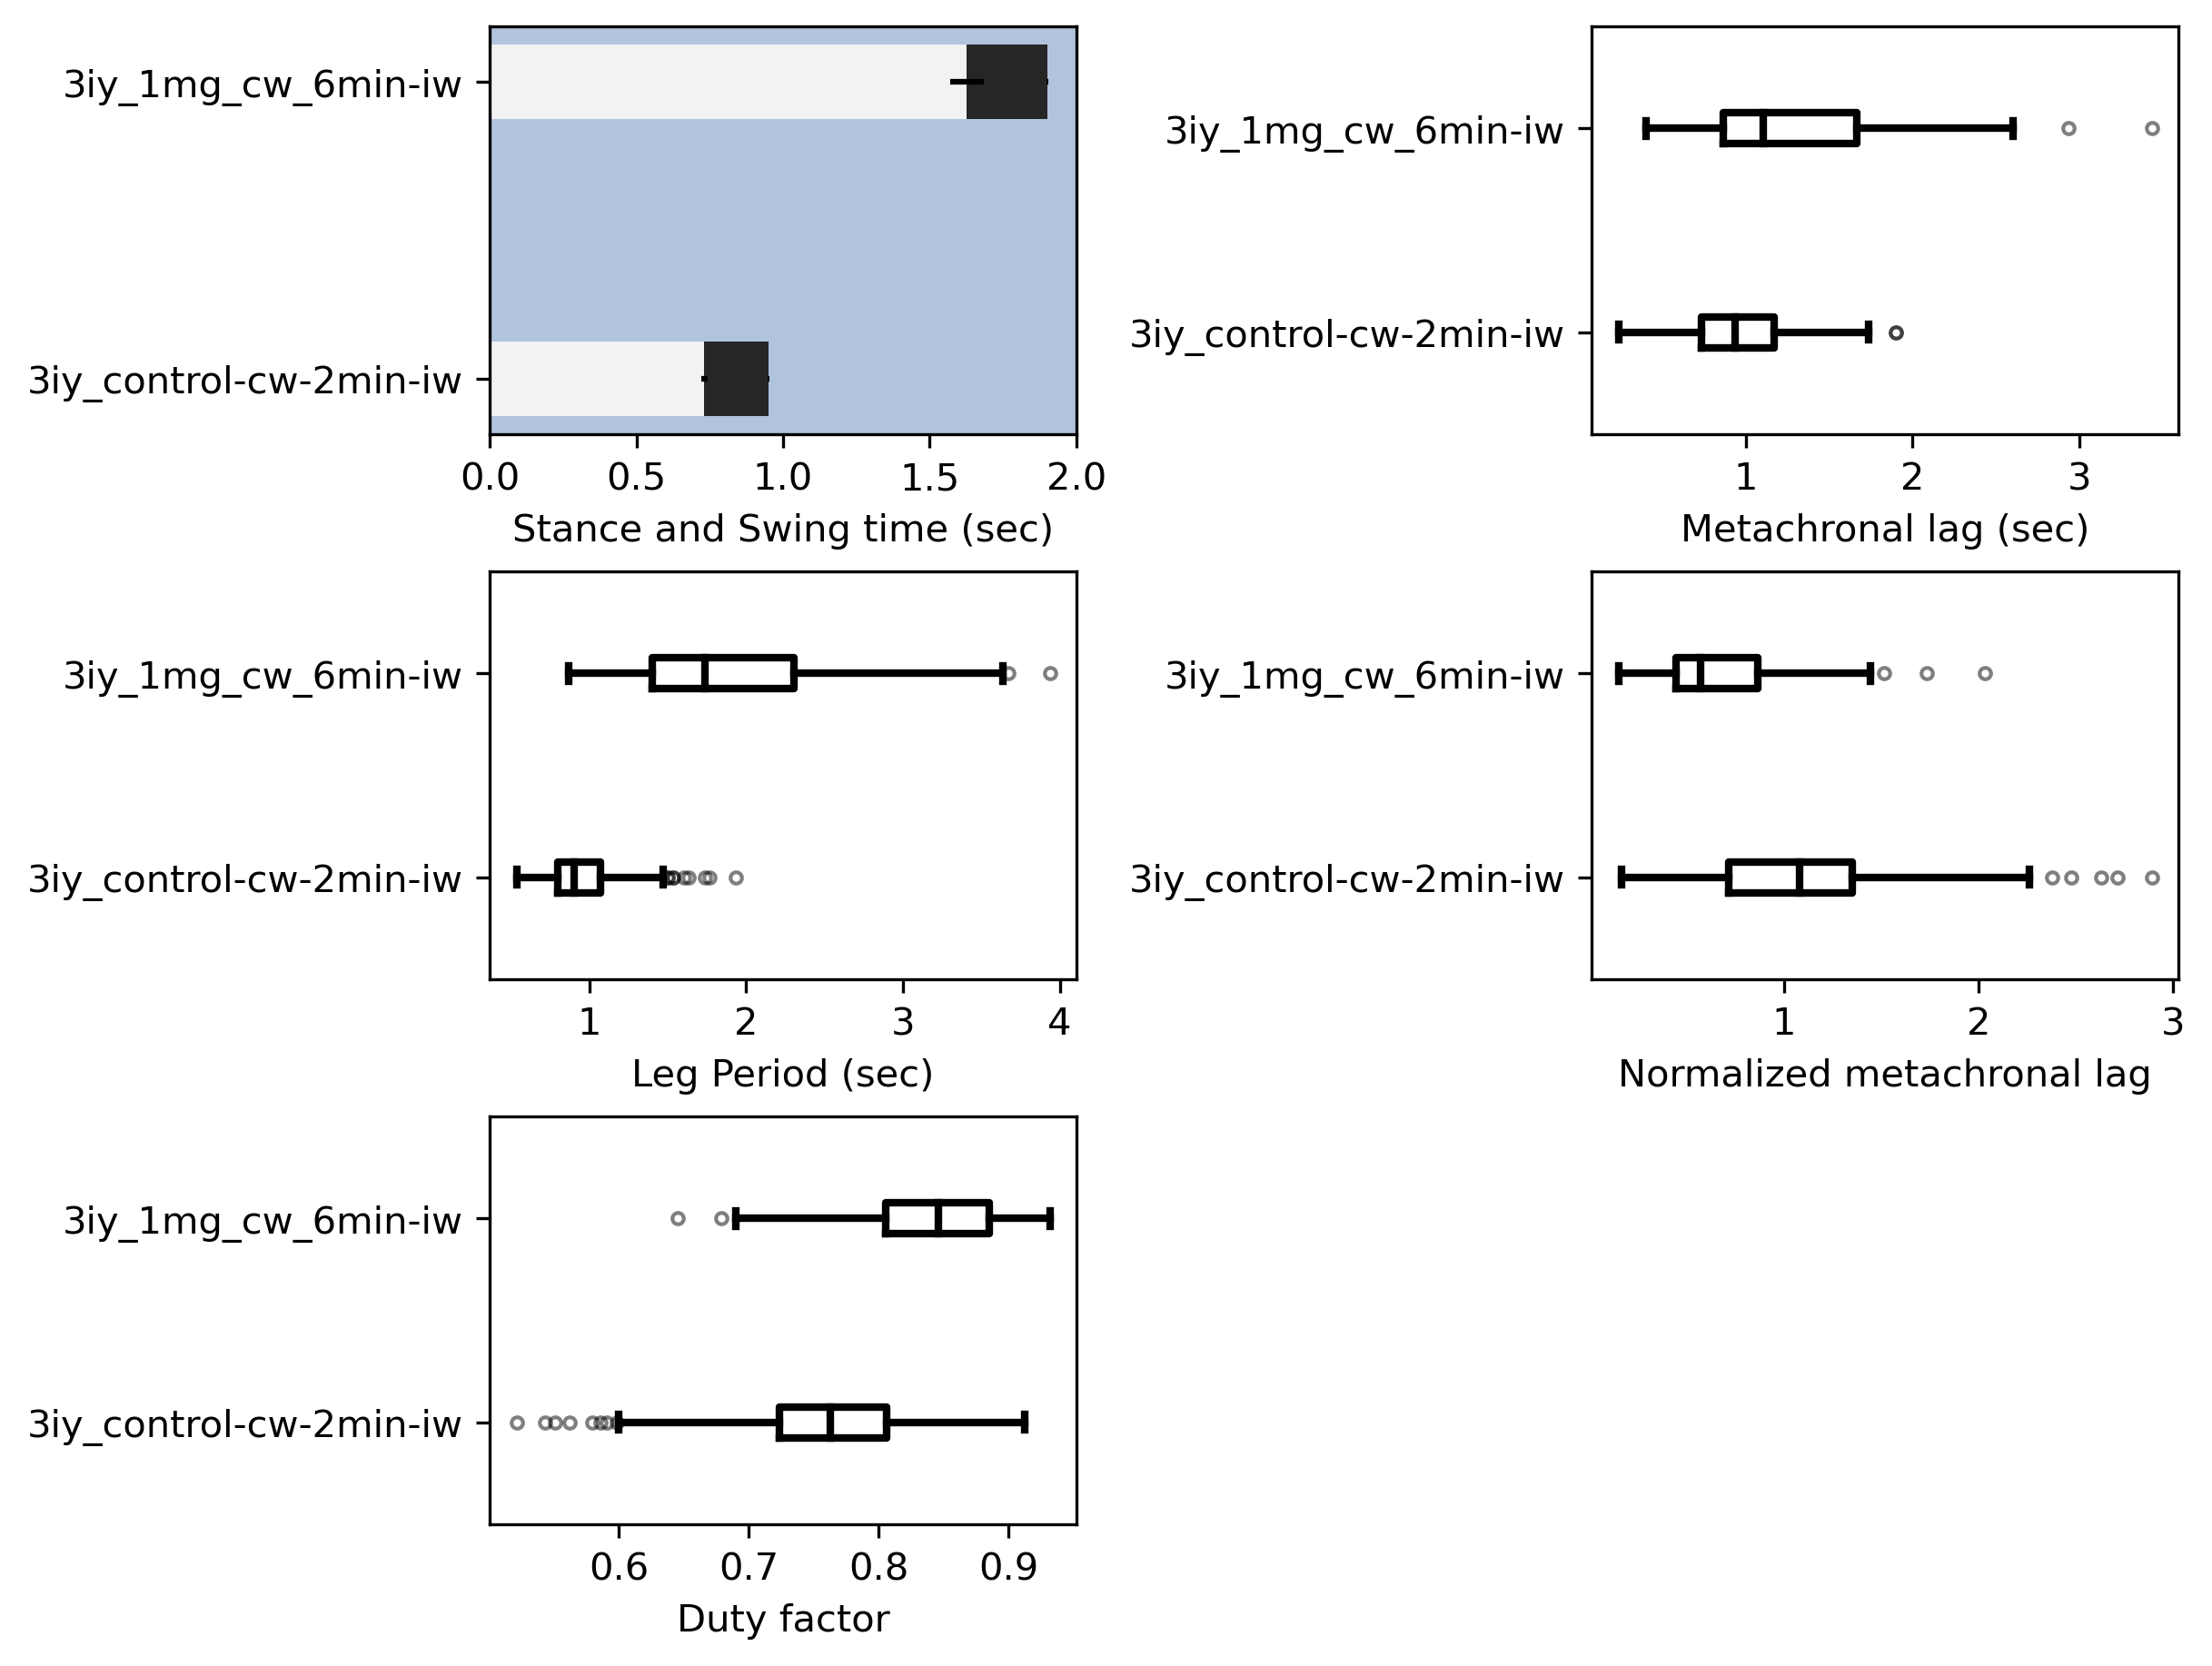

NameError: name 'parameters' is not defined

In [7]:
# compare step parameters for a group of legs
tardigrades_in_clip1 = [1]
tardigrades_in_clip2 = [1]
# which legs should we compare?
legs_to_comp = get_leg_combos()['legs_lateral'] # usually 'legs_lateral' or 'legs_4'
groups = [groupA, groupB]

# what type of comparison should we do?
if len(tardigrades_in_clip1) == 1 and len(tardigrades_in_clip2) == 1:
    # if 1 tardigrade in each group
    # do compare_step_parameters plot
    print('\nOne tardigrade in each group, doing compare_step_parameters plot\n')
    compare_step_parameters([groupA, groupB], [df1, df2], legs_to_comp)
else:
    # if > 1 tardigrades in each group, do paired comparison plots
    # make sure that same tardigrades are in each group
    if tardigrades_in_clip1 == tardigrades_in_clip2:
        print('Same tardigrades in each group, doing paired comparison plots')
        parameters = ['tardigrade_area', 'tardigrade_speed', 'stance_time', 
                      'swing_time', 'gait_cycle', 'duty_factor', 'gait_efficiency']
#         parameters = ['stance_time','swing_time', 'gait_cycle', 'duty_factor']
        tardigrade_data = get_paired_step_parameters(parameters, legs_to_comp, 
                                                     [groupA, groupB], [df1, df2], [size_speed_1, size_speed_2])
    else:
        print('Different tardigrades in these groups ... paired comparisons not appropriate')
        
# print(tardigrade_data)
paired_comparison_plot(parameters, tardigrade_data, groups)

In [ ]:
# gait styles
# compare 1-3
#     charts like those above where we compare each tardigrade pre and post treatment
#     compare % time in (canonical?) tripod, in (canonical?) tetrapod, in pentapod, in stand
    
# compare 4
#     charts like those above where we compare tardigrade pre and post treatment
#     compare % time in stand, step, hop

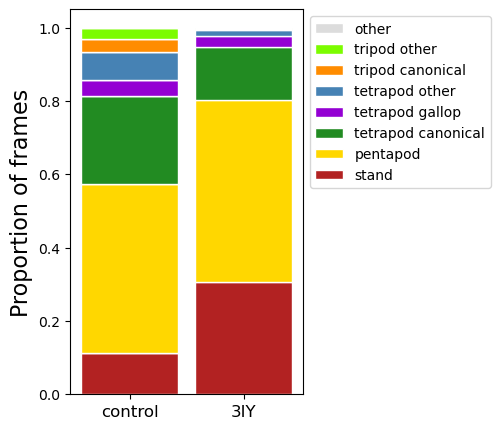

In [10]:
# given a list of clip folders
#    make a list of dictionaries of leg_swing_combo counts
#    plot a bar graph for each dictionary!

clip_folders1 = sorted(list(set(df1['clip'].values)))
clip_folders2 = sorted(list(set(df2['clip'].values)))

movie_folders1 = [os.path.join(tardi_gait, exp_dir, groupA, x) for x in clip_folders1]
movie_folders2 = [os.path.join(tardi_gait, exp_dir, groupB, x) for x in clip_folders2]

leg_set = 'lateral'
leg_swing_combos1 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders1]
combined_leg_swing_combos1 = combineDictionariesWithCommonKeys(leg_swing_combos1)

leg_swing_combos2 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders2]
combined_leg_swing_combos2 = combineDictionariesWithCommonKeys(leg_swing_combos2)

f, ax = gait_style_plot([combined_leg_swing_combos1, combined_leg_swing_combos2], 
                        groups, 
                        leg_set)

ax.set_xticks([0,1],['control','3IY'])
plt.show()

In [ ]:
leg_set = 'rear'
leg_swing_combos1 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders1]
combined_leg_swing_combos1 = combineDictionariesWithCommonKeys(leg_swing_combos1)

leg_swing_combos2 = [get_leg_swing_combos(clip, leg_set) for clip in movie_folders2]
combined_leg_swing_combos2 = combineDictionariesWithCommonKeys(leg_swing_combos2)

f, ax = gait_style_plot([combined_leg_swing_combos1, combined_leg_swing_combos2], 
                        groups, 
                        leg_set)
plt.show()

In [ ]:
# gait style: compare groups in paired plots
# for each tardigrade, show % of time in Tetrapod? Tripod? Pentapod? Stand?
